<a href="https://colab.research.google.com/github/EllieMwangi/Hypothesis-Testing/blob/master/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (10.0, 8.0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load data and glossary
autolib_df = pd.read_csv('autolib_daily_events_postal_code.csv')
glossary = pd.read_excel('columns_explanation.xlsx')

In [ ]:
# Data description
glossary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
# Top 5 rows of autolib data
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Tail
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Sample 10 records
autolib_df.sample(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
9827,92800,1/17/2018,1440,2,weekday,73,79,2,2,1,1,7,6
16052,95880,5/7/2018,1437,0,weekday,17,22,1,3,1,2,0,0
66,75001,3/11/2018,1440,6,weekend,180,177,3,3,12,12,30,28
3337,75116,3/6/2018,1439,1,weekday,9,8,0,0,1,2,2,3
8228,92350,5/23/2018,1174,2,weekday,16,18,1,1,3,2,0,0
4408,92000,2/12/2018,1440,0,weekday,264,259,9,8,7,8,0,0
5769,92190,1/1/2018,1440,0,weekday,65,67,2,2,4,4,0,0
14868,94410,1/31/2018,1440,2,weekday,23,23,0,0,1,1,0,0
1932,75013,3/5/2018,1440,0,weekday,493,490,12,15,28,29,126,127
8255,92350,6/19/2018,1370,1,weekday,0,1,0,0,0,1,0,0


In [ ]:
# Check datatypes
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
# Shape of dataset
autolib_df.shape

(16085, 13)

In [ ]:
# Check for duplicates
autolib_df.duplicated().sum()

0

In [ ]:
# Check for missing values
autolib_df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
# Check for unique values in postal code, dayofWeek, day_type, date
unique_col = ['Postal code', 'date', 'dayOfWeek', 'day_type']
for col in unique_col:
  print(f'Column Name: {col}')
  print(autolib_df[col].unique())
  print('\n')


Column Name: Postal code
[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


Column Name: date
['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '

### Univariate and Multivariate Analysis

In [ ]:
num_var = ['n_daily_data_points', 'dayOfWeek','BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum','Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']

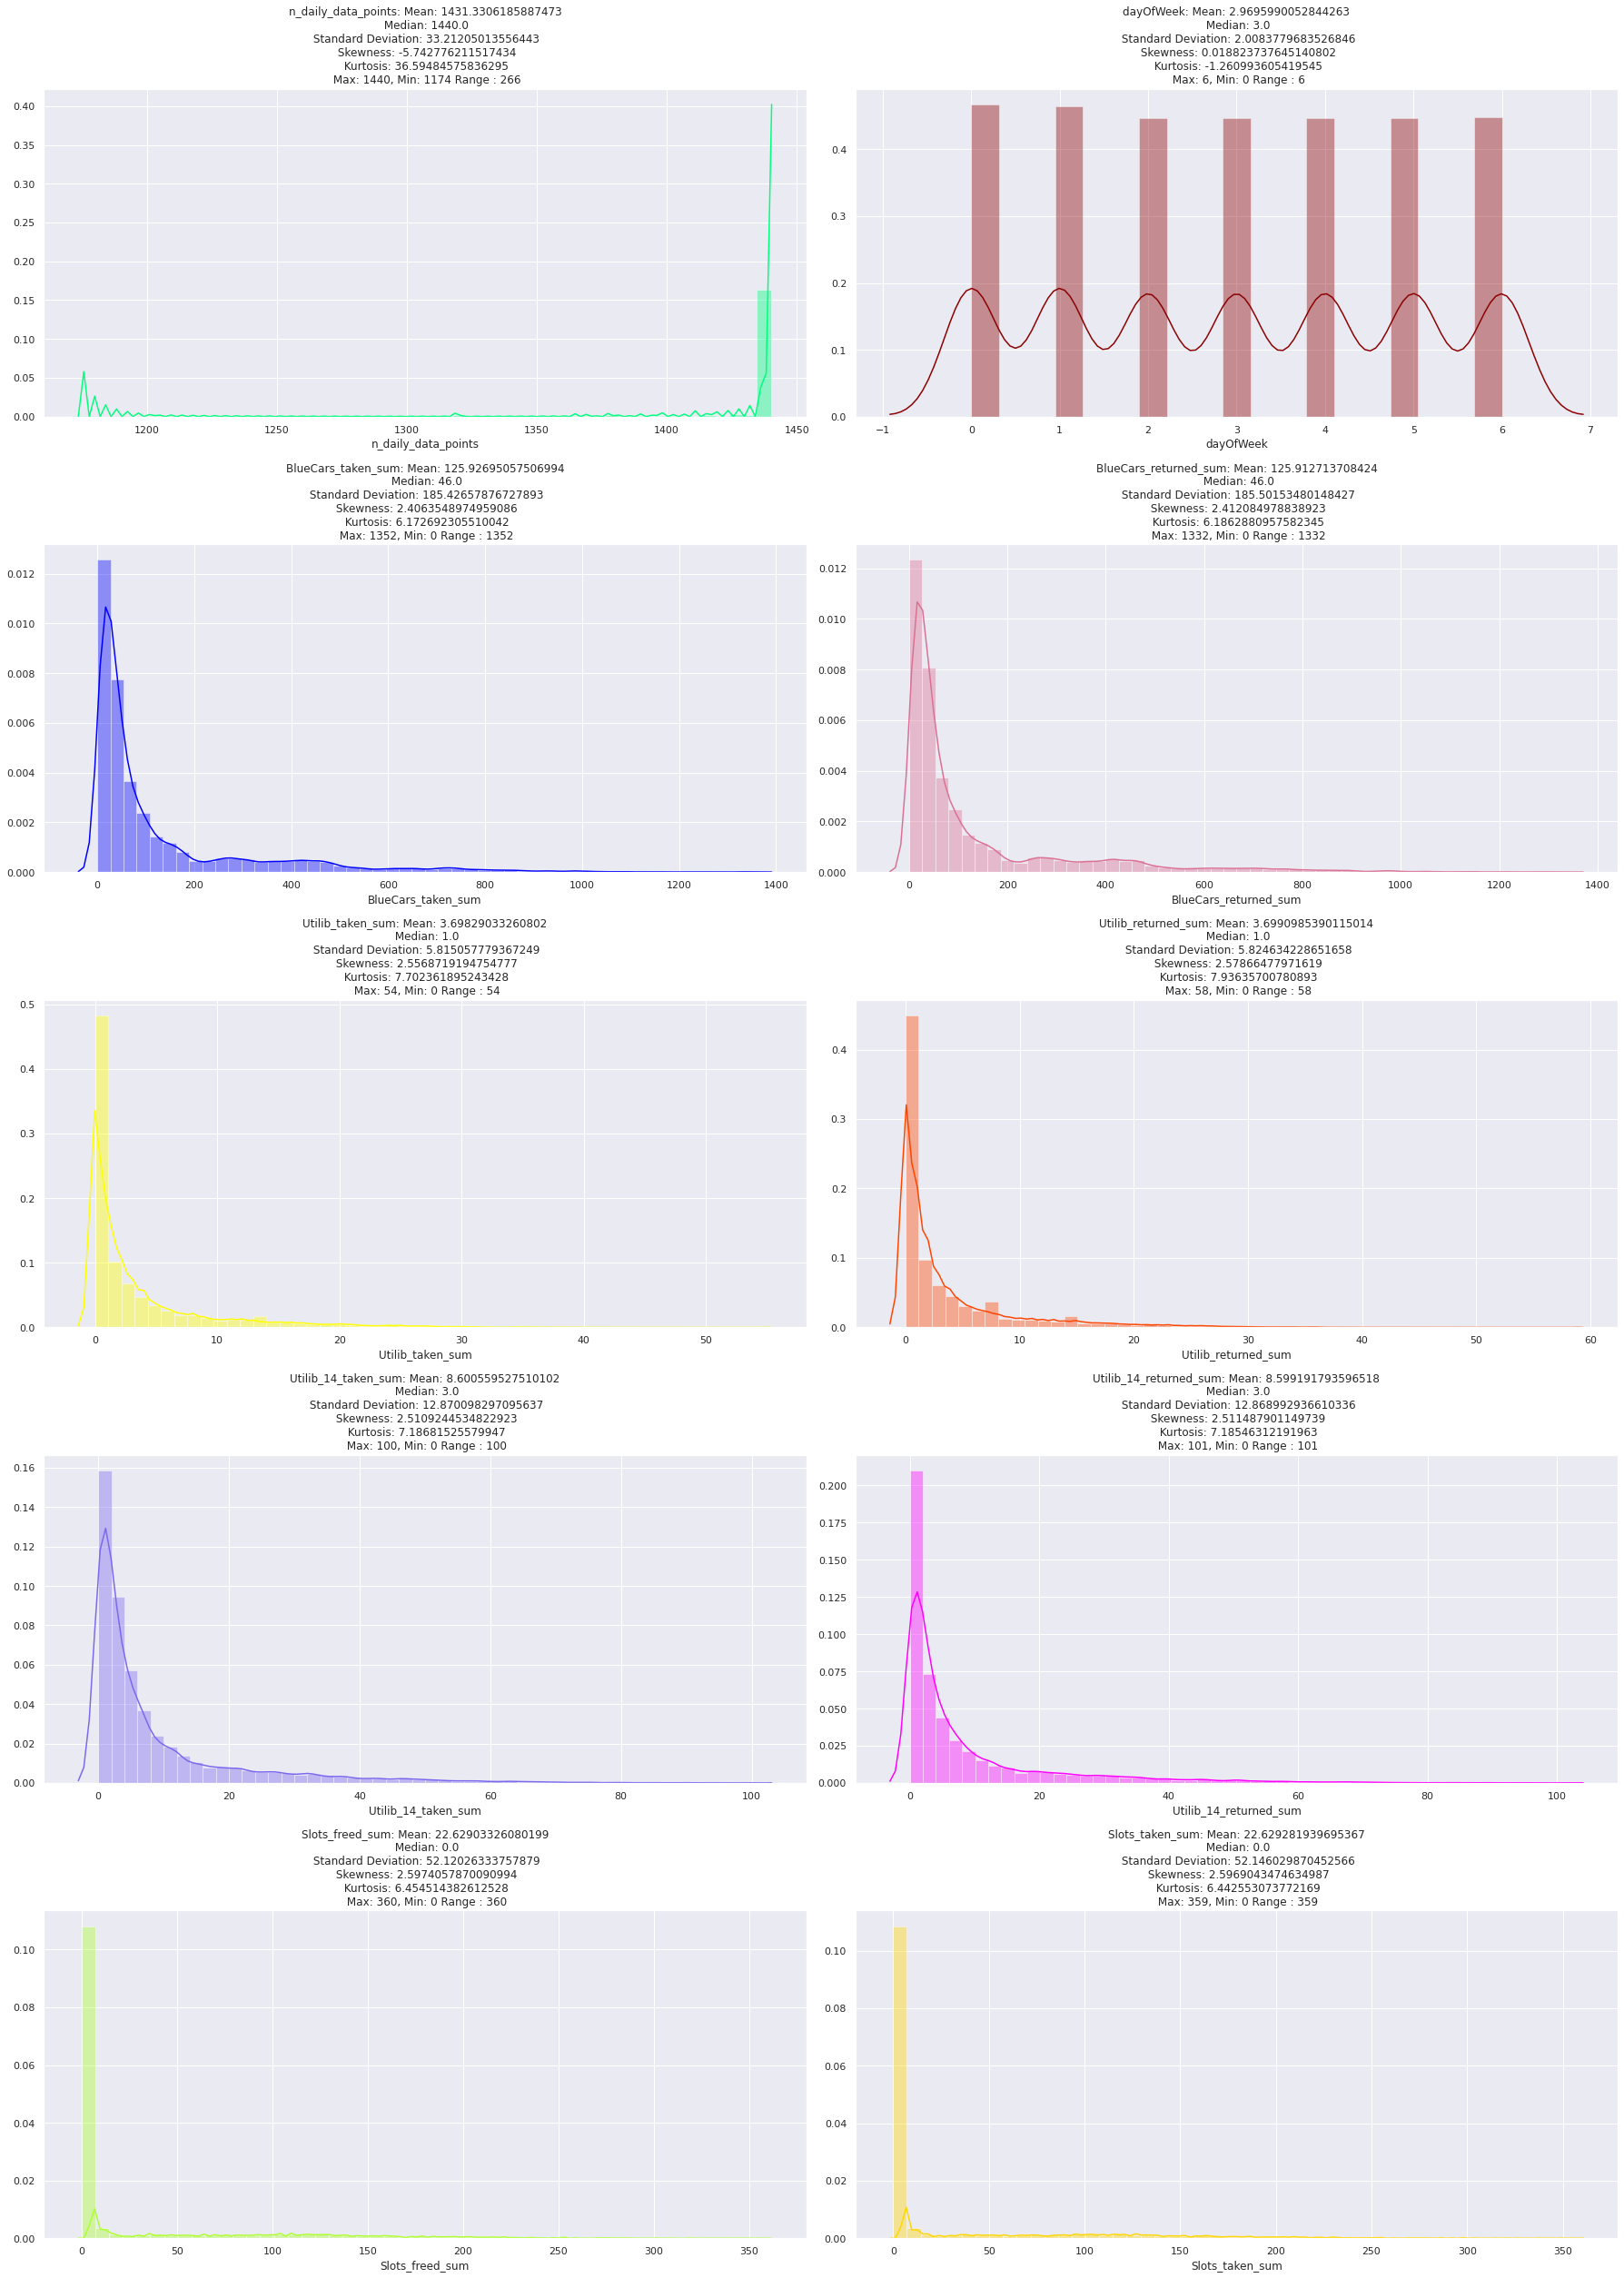

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(25, 35))
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700']

for col, colour, ax in zip(num_var, colors, axes.flatten()):

  mean = autolib_df[col].mean()
  median = autolib_df[col].median()
  standard_var = autolib_df[col].std()
  skew = autolib_df[col].skew()
  kurt = autolib_df[col].kurt()
  max = autolib_df[col].max()
  min = autolib_df[col].min()
  range = autolib_df[col].max() - autolib_df[col].min()

  sns.distplot(autolib_df[col], hist=True, ax=ax, color=colour)
  ax.set_title(f'{col}: Mean: {mean}\n Median: {median}\n Standard Deviation: {standard_var}\n Skewness: {skew}\n Kurtosis: {kurt}\n Max: {max}, Min: {min} Range : {range}')

plt.tight_layout()

- No data points collected on Sundays
- Vehicle return and pickup data is positively skewed.


Text(0.5, 1.0, 'Blue car return rate per day of the week')

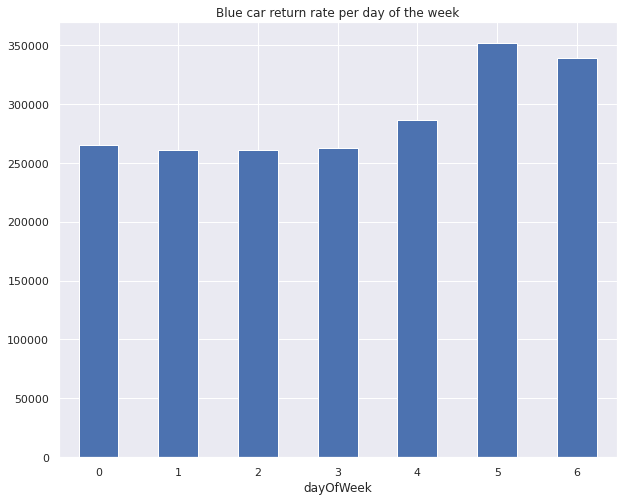

In [ ]:
# Return rate of blue cars per dayof the week
autolib_df.groupby('dayOfWeek')['BlueCars_returned_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Blue car return rate per day of the week')

Saturdays have the highest number of blue cars being returned all over France

Text(0.5, 1.0, 'Blue car pick up rate per day of the week')

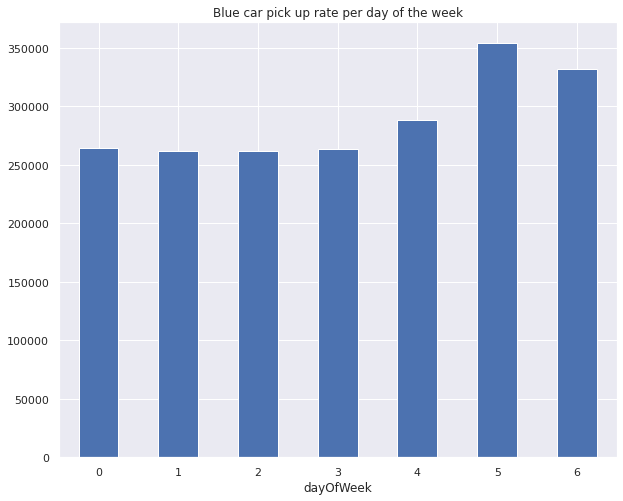

In [ ]:
# Pickup rate of blue cars per dayof the week
autolib_df.groupby('dayOfWeek')['BlueCars_taken_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Blue car pick up rate per day of the week')

Saturdays still have the highest number of blue cars picked up

In [ ]:
# Determine the average number of bluecars picked up per day by postalcode
average_pickup = autolib_df.groupby(['Postal code'])['BlueCars_taken_sum'].mean().sort_values(ascending=False)

In [ ]:
# Postcodes with top 20 average score
average_pickup.head(20)

Postal code
75015    896.955128
75016    790.301282
75017    734.493590
75013    541.596154
75019    525.467949
75012    497.256410
75014    486.294872
75011    480.378205
75020    463.660256
75008    437.480769
75018    425.147436
92100    359.679487
75009    339.121795
75010    316.801282
75005    306.192308
75007    290.288462
75006    266.115385
92130    265.153846
75003    238.384615
75004    201.628205
Name: BlueCars_taken_sum, dtype: float64

Most of the postcodes with high average number of bluecars picked up are Paris (75) department postcodes

In [ ]:
# Postcodes with bottom 20 average score
average_pickup.tail(20)

Postal code
93310    15.371795
94450    15.326923
93350    15.320513
95870    15.243590
92290    13.762821
91370    13.544872
92340    12.551020
93300    12.245161
92390    12.167742
91330    11.666667
92420    11.225806
75116    10.800000
75112     9.685897
91400     9.025806
92360     8.516340
93150     5.258278
94100     4.832258
93370     3.744966
93390     3.630952
93440     3.443709
Name: BlueCars_taken_sum, dtype: float64

Most of the postal codes with the lowest averages of vehicles picked up belong to Seine-Saint-Denis (93) and Hauts-de-Seine (92) and Val-de-Marne (94) department postcodes

In [ ]:
# Determine the average number of bluecars returned per day by postalcode
average_dropoff = autolib_df.groupby(['Postal code'])['BlueCars_returned_sum'].mean().sort_values(ascending=False)

In [ ]:
# Determine top 20 post codes
average_dropoff.head(20)

Postal code
75015    897.070513
75016    789.884615
75017    734.237179
75013    541.339744
75019    525.788462
75012    497.352564
75014    486.006410
75011    480.448718
75020    464.134615
75008    437.147436
75018    425.288462
92100    359.782051
75009    338.852564
75010    316.839744
75005    306.108974
75007    289.685897
75006    265.967949
92130    265.198718
75003    238.166667
75004    201.596154
Name: BlueCars_returned_sum, dtype: float64

Most of the postcodes with high average number of bluecars dropped off are Paris (75) department postcodes

In [ ]:
# Determine bottom 20 postcodes
average_dropoff.tail(20)

Postal code
94450    15.378205
93310    15.352564
93350    15.282051
95870    15.217949
92290    13.724359
91370    13.493590
92340    12.551020
92390    12.225806
93300    12.200000
91330    11.589744
92420    11.238710
75116    10.761290
75112     9.679487
91400     9.012903
92360     8.509804
93150     5.225166
94100     4.812903
93370     3.731544
93390     3.595238
93440     3.483444
Name: BlueCars_returned_sum, dtype: float64

Most of the postal codes with the lowest averages of vehicles picked up belong to Seine-Saint-Denis (93) and Hauts-de-Seine (92) department postcodes

Text(0.5, 1.0, 'Number of bluecars picked up per each Weekday')

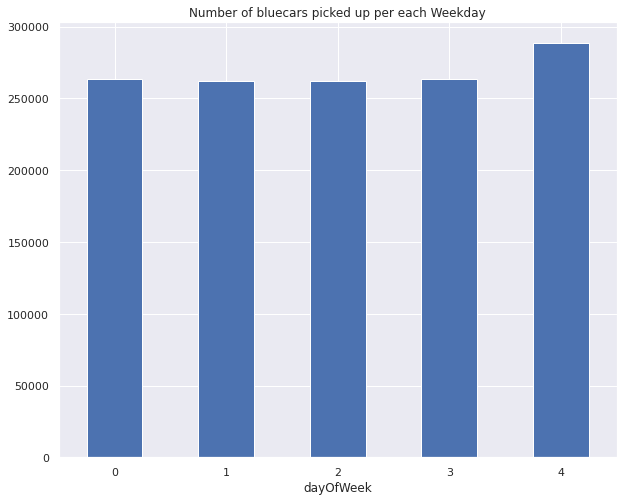

In [ ]:
# Compare blue car pickup behaviour based on weekdays

autolib_df[autolib_df['day_type'] == 'weekday'].groupby('dayOfWeek')['BlueCars_taken_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Number of bluecars picked up per each Weekday')

Text(0.5, 1.0, 'Number of bluecars dropped off per each Weekday')

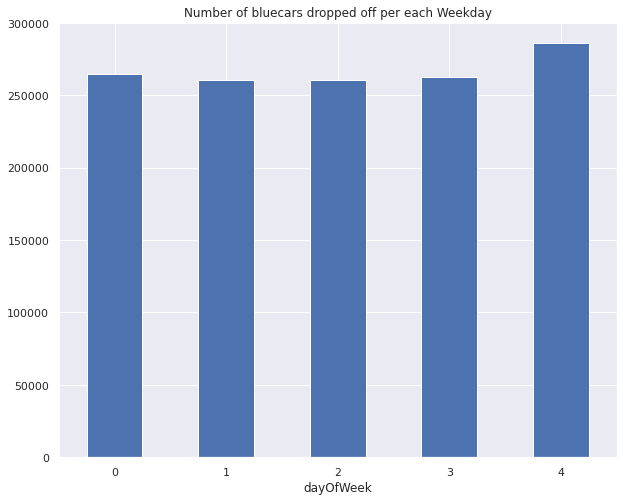

In [ ]:
# Compare blue car dropoff behaviour based on weekdays

autolib_df[autolib_df['day_type'] == 'weekday'].groupby('dayOfWeek')['BlueCars_returned_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Number of bluecars dropped off per each Weekday')

Fridays have the highest pickup and dropoff numbers

Text(0.5, 1.0, 'Number of bluecars picked up per each weekend')

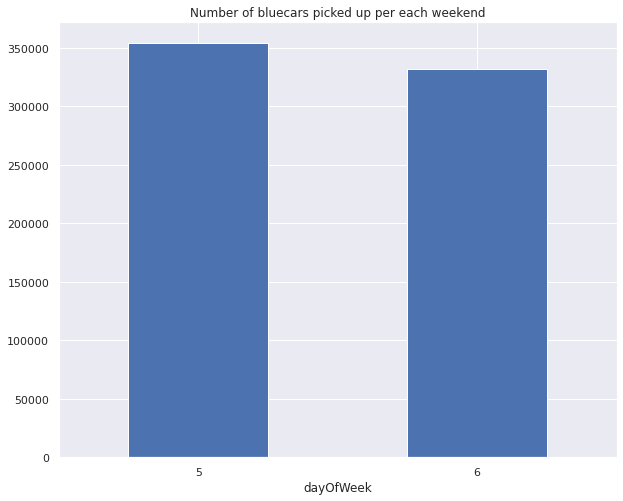

In [ ]:
# Compare blue car pickup behaviour based on weekends

autolib_df[autolib_df['day_type'] == 'weekend'].groupby('dayOfWeek')['BlueCars_taken_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Number of bluecars picked up per each weekend')

Text(0.5, 1.0, 'Number of bluecars dropped off per each weekend')

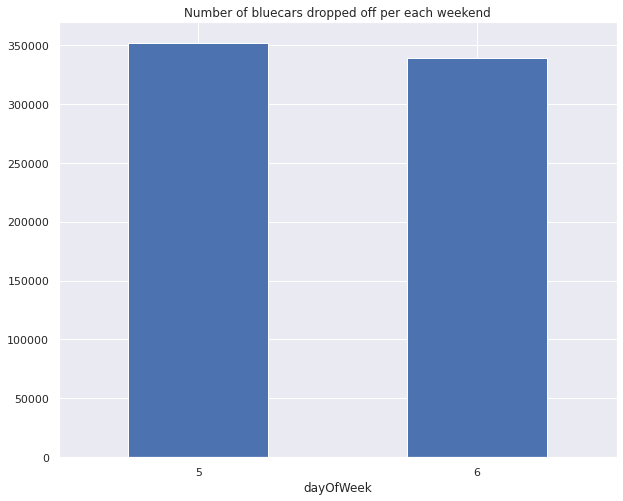

In [ ]:
# Compare blue car dropoff behaviour based on weekends

autolib_df[autolib_df['day_type'] == 'weekend'].groupby('dayOfWeek')['BlueCars_returned_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Number of bluecars dropped off per each weekend')

Saturdays have a higher pickup and drop off rate than Sundays

## Hypothesis Testing

The dataset contains datapoints collected from autolib stations in various postcodes in the Île-de-France region of France. The region is made up of eight administrative departments: Paris, Essonne, Hauts-de-Seine, Seine-Saint-Denis, Seine-et-Marne, Val-de-Marne, Val-d'Oise and Yvelines. Postcodes from which the dataset are located in nearly all departments except Seine-et-Marne.

In this hypothesis test, I set out to investigate if the department to which a postcode belongs influences number of blue vehicles collected per day. I believe that the department of each postcode definitely influences the number of blue cars picked up. Proving or disaproving this hypothesis would help Autolib management to create a blue car placement strategy. Knowing if they should provide postcodes in certain departments with more vehicles or not.

- H0 = Averages of blue cars taken in a day per department are equal.
- H1 = At least, one department average is different from other departments.



To carry out the hypothesis test, first we need to perform stratified sampling of each department from our data.

- Population size(N): 16085  rows
- Sampling Frame: Same as dataset size, 16085 rows
- Stratification: Administrative department
- Sample size: With a 5% error margin and a 95% confidence level, we will use a sample size of 380

In [ ]:
# Create department column in our data
autolib_df['Postal code'] = autolib_df['Postal code'].astype(str)


conditions = [(autolib_df['Postal code'].str.startswith('75')),
              (autolib_df['Postal code'].str.startswith('78')),
              (autolib_df['Postal code'].str.startswith('91')),
              (autolib_df['Postal code'].str.startswith('92')),
              (autolib_df['Postal code'].str.startswith('93')),
              (autolib_df['Postal code'].str.startswith('94')),
              (autolib_df['Postal code'].str.startswith('95'))]

values = ['Paris', 'Yvelines','Essonne','Hauts-de-Seine','Seine-Saint-Denis','Val-de-Marne',"Val-d'Oise"]

autolib_df['department'] = np.select(conditions, values)

In [ ]:
autolib_df.sample(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,department
3208,75112,4/2/2018,1439,0,weekday,5,5,0,0,0,0,1,1,Paris
382,75003,3/15/2018,1440,3,weekday,196,192,8,7,19,21,60,60,Paris
8315,92360,3/5/2018,1440,0,weekday,7,4,0,0,0,0,0,0,Hauts-de-Seine
218,75002,3/7/2018,1440,2,weekday,173,173,6,6,12,12,26,26,Paris
260,75002,4/18/2018,1377,2,weekday,151,147,4,4,10,9,36,34,Paris
591,75004,5/7/2018,1437,0,weekday,168,179,4,4,18,19,39,39,Paris
6243,92220,1/7/2018,1440,6,weekend,55,57,2,0,4,6,5,5,Hauts-de-Seine
13432,94110,6/18/2018,1440,0,weekday,30,34,1,1,0,2,0,0,Val-de-Marne
13002,94000,2/5/2018,1440,0,weekday,74,79,1,4,4,5,0,0,Val-de-Marne
5330,92150,1/30/2018,1440,1,weekday,157,161,2,3,11,9,3,4,Hauts-de-Seine


In [ ]:
# Determine occurence of each department in data
autolib_df['department'].value_counts(ascending=False, normalize=True)*100

Hauts-de-Seine       34.821262
Paris                21.330432
Seine-Saint-Denis    18.650917
Val-de-Marne         16.474977
Yvelines              2.909543
Val-d'Oise            2.909543
Essonne               2.903326
Name: department, dtype: float64

Carry out stratified sampling based on department proportions.

In [ ]:
# Stratified sampling
strat_output = autolib_df.groupby('department', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=(380/16085)))
 

In [ ]:
# Check number of rows from each department in stratified sample
strat_output.department.value_counts()

Hauts-de-Seine       132
Paris                 81
Seine-Saint-Denis     71
Val-de-Marne          63
Val-d'Oise            11
Yvelines              11
Essonne               11
Name: department, dtype: int64

In [ ]:
import random
# Sample 10 records per department
sampled_dept_data = pd.DataFrame({
    'Hauts-de-Seine': random.sample(list(strat_output[strat_output.department == 'Hauts-de-Seine']['BlueCars_taken_sum']), 10),
    'Paris': random.sample(list(strat_output[strat_output.department == 'Paris']['BlueCars_taken_sum']), 10),
    'Seine-Saint-Denis': random.sample(list(strat_output[strat_output.department == 'Seine-Saint-Denis']['BlueCars_taken_sum']),10),
    'Val-de-Marne': random.sample(list(strat_output[strat_output.department == 'Val-de-Marne']['BlueCars_taken_sum']),10),
    "Val-d'Oise": random.sample(list(strat_output[strat_output.department == "Val-d'Oise"]['BlueCars_taken_sum']),10),
    'Yvelines': random.sample(list(strat_output[strat_output.department == 'Yvelines']['BlueCars_taken_sum']),10),
    'Essonne': random.sample(list(strat_output[strat_output.department == 'Essonne']['BlueCars_taken_sum']),10) })

In [ ]:
sampled_dept_data

,Hauts-de-Seine,Paris,Seine-Saint-Denis,Val-de-Marne,Val-d'Oise,Yvelines,Essonne
0,138,478,30,99,16,34,8
1,22,351,6,35,17,38,59
2,33,395,17,25,22,33,6
3,65,20,29,57,15,38,3
4,327,487,26,40,14,32,7
5,84,473,28,78,24,40,5
6,30,301,19,47,13,37,9
7,156,160,7,24,29,45,12
8,43,518,61,66,15,41,9
9,144,25,149,44,14,53,20


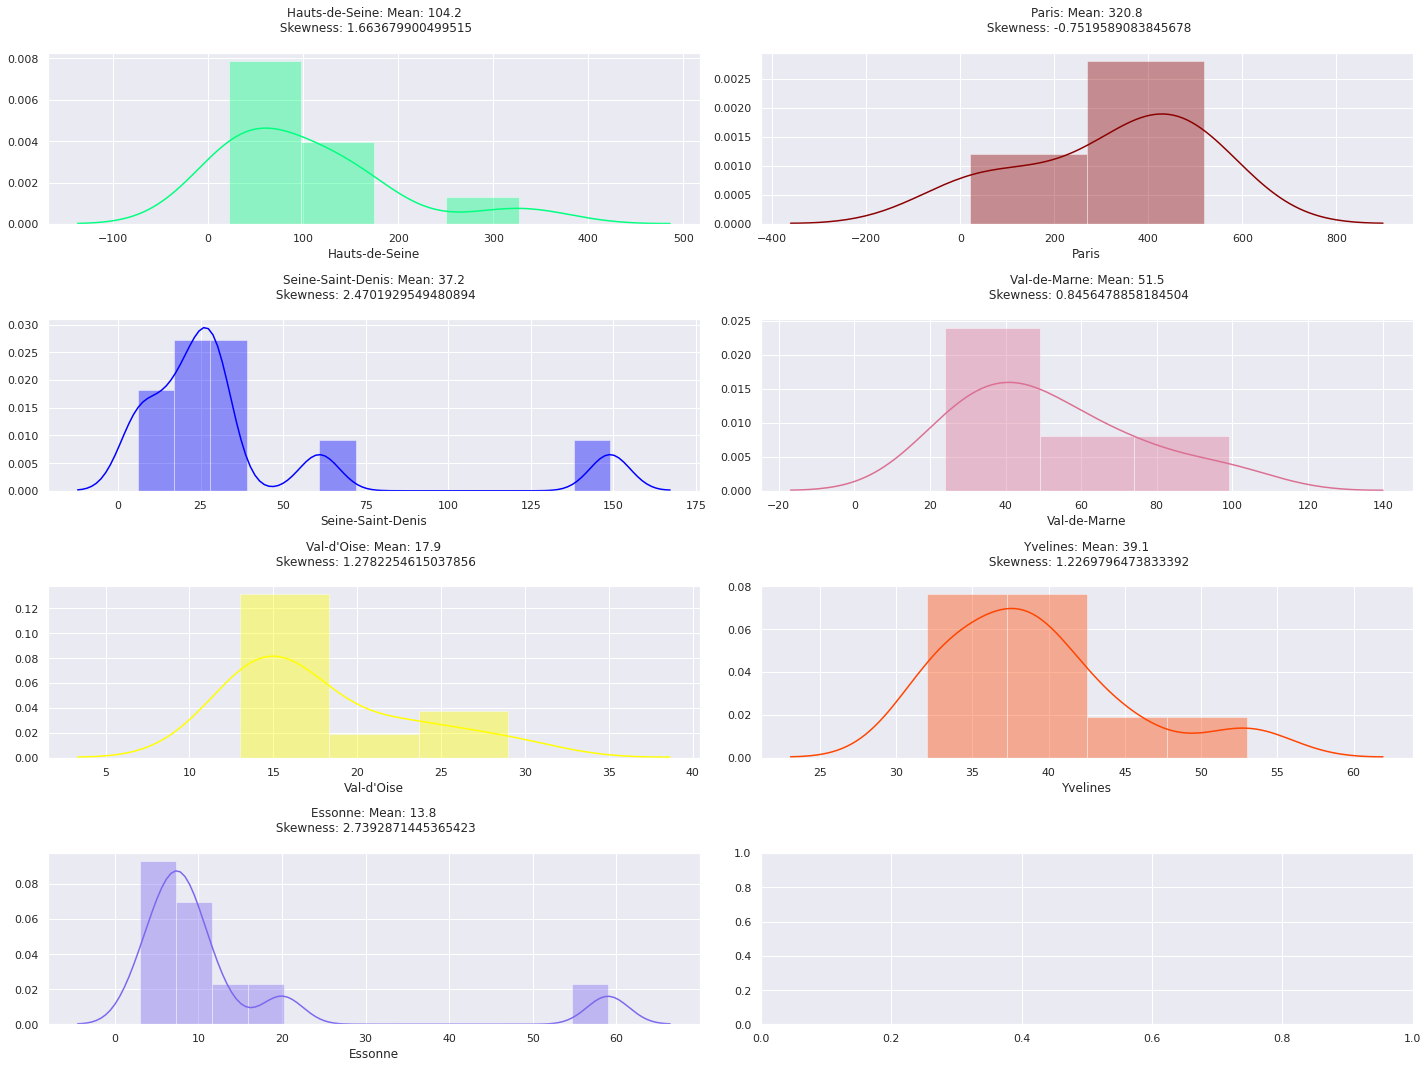

In [ ]:
# Check for distribution across different departments
departments = sampled_dept_data.columns.to_list()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF']

for col, colour, ax in zip(departments, colors, axes.flatten()):
  mean = sampled_dept_data[col].mean()
  skew = sampled_dept_data[col].skew()
  sns.distplot(sampled_dept_data[col], hist=True, ax=ax, color=colour)
  ax.set_title(f'{col}: Mean: {mean}\n Skewness: {skew}\n')

plt.tight_layout()

The sampled data is clearly not normally distributed, however we should run the Shapiro Wilk Test for normality

In [ ]:
from scipy.stats import shapiro 

# Test for normality with alpha 0.05
for dept in departments:
  print(f'Administrative department: {dept}')
  stats, p = shapiro(sampled_dept_data[dept])
  print(f'P-Value: {p}, {p > 0.05} ')

Administrative department: Hauts-de-Seine
P-Value: 0.023720847442746162, False 
Administrative department: Paris
P-Value: 0.07656315714120865, True 
Administrative department: Seine-Saint-Denis
P-Value: 0.00042561578447930515, False 
Administrative department: Val-de-Marne
P-Value: 0.49941375851631165, True 
Administrative department: Val-d'Oise
P-Value: 0.0315437875688076, False 
Administrative department: Yvelines
P-Value: 0.2442869395017624, True 
Administrative department: Essonne
P-Value: 6.4100582676474e-05, False 


An assumption of an ANOVA test is that observations follow a gaussian distribution. The sampled data above does not meet this requirement. Therefore increase the sample size from 380 to 760

In [ ]:
# Stratified sampling
strat_output_2 = autolib_df.groupby('department', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=(760/16085)))
 

In [ ]:
strat_output_2.department.value_counts()

Hauts-de-Seine       265
Paris                162
Seine-Saint-Denis    142
Val-de-Marne         125
Val-d'Oise            22
Yvelines              22
Essonne               22
Name: department, dtype: int64

In [ ]:
# Sample 20 records per department
sample2_dept_data = pd.DataFrame({
    'Hauts-de-Seine': random.sample(list(strat_output_2[strat_output_2.department == 'Hauts-de-Seine']['BlueCars_taken_sum']), 20),
    'Paris': random.sample(list(strat_output_2[strat_output_2.department == 'Paris']['BlueCars_taken_sum']), 20),
    'Seine-Saint-Denis': random.sample(list(strat_output_2[strat_output_2.department == 'Seine-Saint-Denis']['BlueCars_taken_sum']),20),
    'Val-de-Marne': random.sample(list(strat_output_2[strat_output_2.department == 'Val-de-Marne']['BlueCars_taken_sum']),20),
    "Val-d'Oise": random.sample(list(strat_output_2[strat_output_2.department == "Val-d'Oise"]['BlueCars_taken_sum']),20),
    'Yvelines': random.sample(list(strat_output_2[strat_output_2.department == 'Yvelines']['BlueCars_taken_sum']),20),
    'Essonne': random.sample(list(strat_output_2[strat_output_2.department == 'Essonne']['BlueCars_taken_sum']),20) })

In [ ]:
sample2_dept_data

,Hauts-de-Seine,Paris,Seine-Saint-Denis,Val-de-Marne,Val-d'Oise,Yvelines,Essonne
0,67,390,2,53,20,47,12
1,157,432,14,31,19,50,9
2,30,301,6,33,9,38,15
3,121,450,28,38,26,25,9
4,29,209,28,7,23,33,21
5,20,741,15,24,16,31,4
6,101,318,12,45,27,34,7
7,29,593,35,31,8,51,10
8,76,284,16,61,16,31,5
9,117,145,13,22,15,75,2


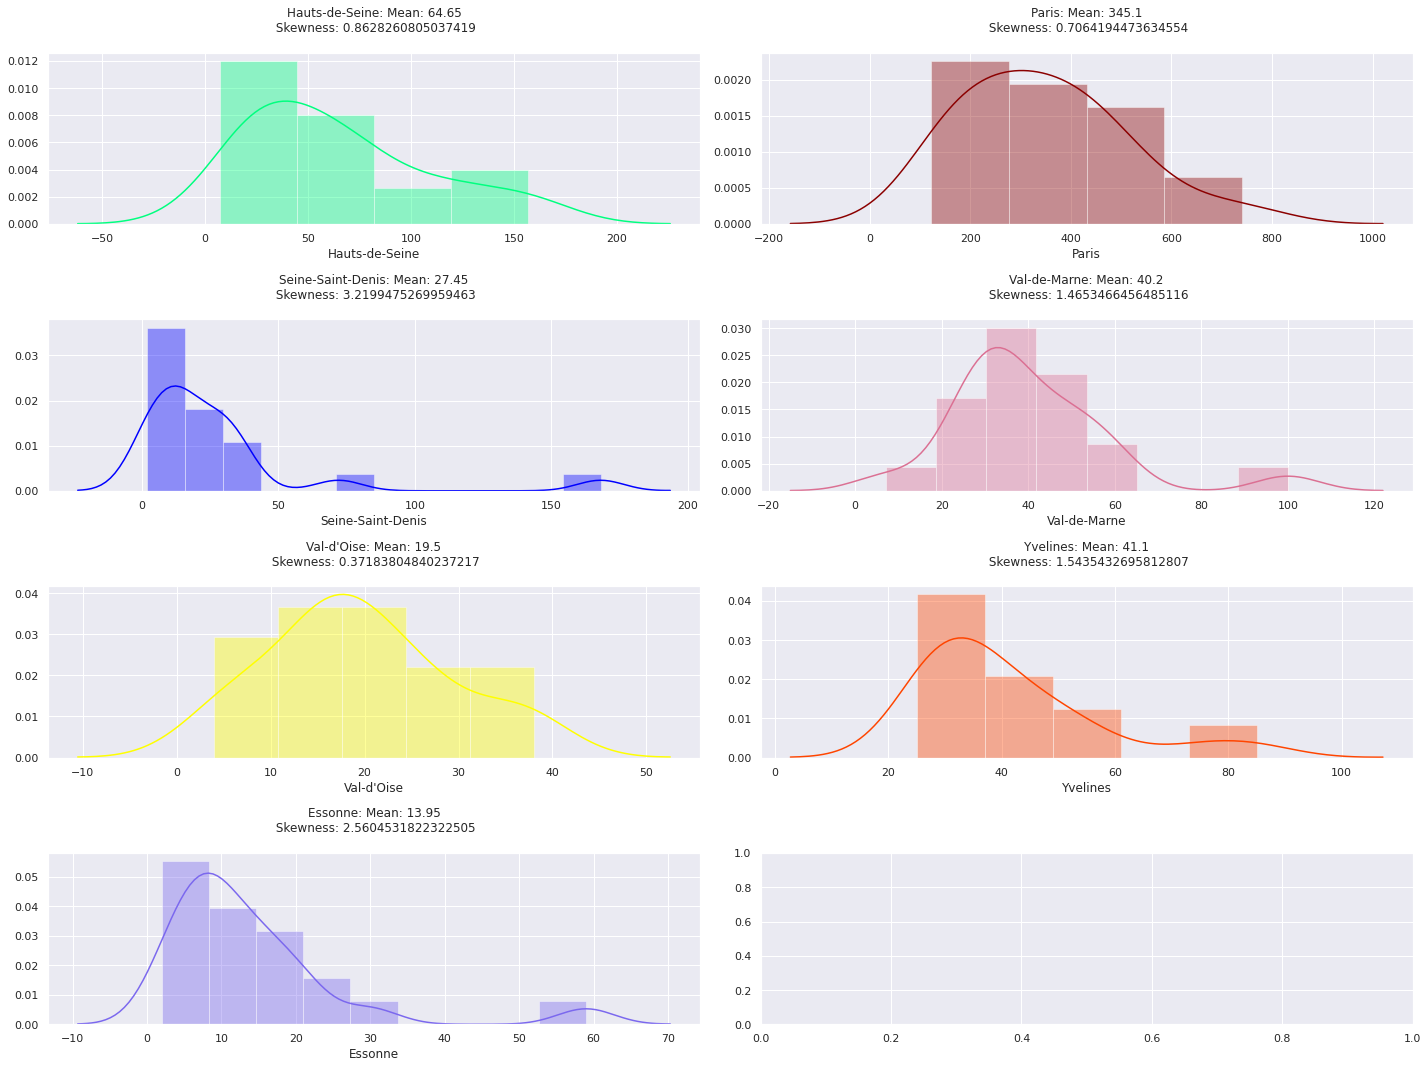

In [ ]:
# Check for distribution across different departments

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF']

for col, colour, ax in zip(departments, colors, axes.flatten()):
  mean = sample2_dept_data[col].mean()
  skew = sample2_dept_data[col].skew()
  sns.distplot(sample2_dept_data[col], hist=True, ax=ax, color=colour)
  ax.set_title(f'{col}: Mean: {mean}\n Skewness: {skew}\n')

plt.tight_layout()

With increased sample size, the data still exhibits non-normality in some department data. ANOVA being a parametric test assumes that data follows a normal distribution. To bring data closer to a gaussian transformation, perform a box cox transformation.

In [ ]:
sample2_dept_data

,Hauts-de-Seine,Paris,Seine-Saint-Denis,Val-de-Marne,Val-d'Oise,Yvelines,Essonne
0,67,390,2,53,20,47,12
1,157,432,14,31,19,50,9
2,30,301,6,33,9,38,15
3,121,450,28,38,26,25,9
4,29,209,28,7,23,33,21
5,20,741,15,24,16,31,4
6,101,318,12,45,27,34,7
7,29,593,35,31,8,51,10
8,76,284,16,61,16,31,5
9,117,145,13,22,15,75,2


In [ ]:
# To bring the data closer to a gaussian distribution use a box transformation
from scipy.stats import boxcox
for dept in departments:
  sample2_dept_data[dept] = boxcox(sample2_dept_data[dept], 0)

In [ ]:
sample2_dept_data

,Hauts-de-Seine,Paris,Seine-Saint-Denis,Val-de-Marne,Val-d'Oise,Yvelines,Essonne
0,4.204693,5.966147,0.693147,3.970292,2.995732,3.850148,2.484907
1,5.056246,6.068426,2.639057,3.433987,2.944439,3.912023,2.197225
2,3.401197,5.707110,1.791759,3.496508,2.197225,3.637586,2.708050
3,4.795791,6.109248,3.332205,3.637586,3.258097,3.218876,2.197225
4,3.367296,5.342334,3.332205,1.945910,3.135494,3.496508,3.044522
5,2.995732,6.608001,2.708050,3.178054,2.772589,3.433987,1.386294
6,4.615121,5.762051,2.484907,3.806662,3.295837,3.526361,1.945910
7,3.367296,6.385194,3.555348,3.433987,2.079442,3.931826,2.302585
8,4.330733,5.648974,2.772589,4.110874,2.772589,3.433987,1.609438
9,4.762174,4.976734,2.564949,3.091042,2.708050,4.317488,0.693147


### Anova Test

Because I am comparing means across more than two groups, I will carry out an ANOVA test with significance level of 0.05 

In [ ]:
# stats f_oneway functions takes the groups as input and returns F and P-value
from scipy.stats import f_oneway
fvalue, pvalue = f_oneway(sample2_dept_data['Hauts-de-Seine'], sample2_dept_data['Paris'], sample2_dept_data['Seine-Saint-Denis'], sample2_dept_data['Val-de-Marne'], sample2_dept_data["Val-d'Oise"],sample2_dept_data['Yvelines'], sample2_dept_data['Essonne'])
print(fvalue, pvalue)

alpha = 0.05

if pvalue < alpha:
  print('Significant differences among group means, reject null hypothesis')
else:
  print('Lack of significant differences among group means, fail to reject null hypothesis')

49.29716716392171 1.7360305012013504e-31
Significant differences among group means, reject null hypothesis


### Post Hoc Analysis

Significant differences have been established between group means, however ANOVA does not tell which departments are significantly different from each other. To know the pairs of significant different departments
, we will perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.

In [ ]:
!pip install pingouin

In [ ]:
d_melt = pd.melt(sample2_dept_data.reset_index(), id_vars=['index'], value_vars=departments)
d_melt.columns = ['index','factors', 'value']

In [ ]:
from pingouin import pairwise_tukey
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukey(data=d_melt, dv='value', between='factors')
print(m_comp)

                    A                  B  ...   p-tukey    hedges
0             Essonne     Hauts-de-Seine  ...  0.001000 -2.153774
1             Essonne              Paris  ...  0.001000 -4.647669
2             Essonne  Seine-Saint-Denis  ...  0.613651 -0.532512
3             Essonne         Val-d'Oise  ...  0.327491 -0.665243
4             Essonne       Val-de-Marne  ...  0.001000 -1.702276
5             Essonne           Yvelines  ...  0.001000 -1.805060
6      Hauts-de-Seine              Paris  ...  0.001000 -2.493895
7      Hauts-de-Seine  Seine-Saint-Denis  ...  0.001000  1.621262
8      Hauts-de-Seine         Val-d'Oise  ...  0.001000  1.488531
9      Hauts-de-Seine       Val-de-Marne  ...  0.768519  0.451498
10     Hauts-de-Seine           Yvelines  ...  0.900000  0.348714
11              Paris  Seine-Saint-Denis  ...  0.001000  4.115157
12              Paris         Val-d'Oise  ...  0.001000  3.982426
13              Paris       Val-de-Marne  ...  0.001000  2.945393
14        